## Depth distributions - main figures

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Set directory with trajectory data

In [2]:
datadir = '/Users/rfische1/Documents/UU/'
         #'/data/oceanparcels/output_data/data_Delphine/' 
         #'/nethome/lobel001/biofouling_3dtransport_2/Simulation/Sim_output/' 
         #/data/oceanparcels/output_data/data_Reint/'

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
from copy import copy
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import math
import cmocean

In [4]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [5]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [6]:
runtime = 458 #822        # [days]
start_yr = 2003
biofouling = 'MEDUSA'
rho_bf = 1170
rho_pl = 920

In [7]:
region = ['EqPac','NPSG', 'SO']
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_'+biofouling
time_plot = round((runtime-91)*24/outputdt)
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'
proc = 'bfnoadv'
season = 'Oct'
season_string = {'Jan':'January - July', 'MAM':'March - September', 'JJA':'June - December', 'SON':'September - March','DJF':'December - June'}

In [8]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_'+proc+'_'+season+'_'+str(start_yr)+'_'+res+'res_'+mixing+'_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_'+proc+'_'+season+'_'+str(start_yr)+'_'+res+'res_'+mixing+'_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt_extraoutput.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region[2]+'_'+proc+'_'+season+'_'+str(start_yr)+'_'+res+'res_'+mixing+'_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [9]:
# depth_numbers = np.load(datadir+'depth_numbers_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days.npy')
# depth_Ratio = np.load(datadir+'depth_Ratio_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days.npy')
# depth_Dominant = np.load(datadir+'depth_Dominant_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days.npy')

In [10]:
dslist = [ds_0, ds_1, ds_2]

In [11]:
mld_0 = np.mean(ds_0['mld'][:,1:],axis=0)
ez_0 = np.mean(ds_0['euphz'][:,1:],axis=0)
mld_0 = np.concatenate(([mld_0[0]],mld_0))
ez_0 = np.concatenate(([ez_0[0]],ez_0))

mld_1 = np.mean(ds_1['mld'][:,1:],axis=0)
ez_1 = np.mean(ds_1['euphz'][:,1:],axis=0)
mld_1 = np.concatenate(([mld_1[0]],mld_1))
ez_1 = np.concatenate(([ez_1[0]],ez_1))

mld_2 = np.mean(ds_2['mld'][:,1:],axis=0)
ez_2 = np.mean(ds_2['euphz'][:,1:],axis=0)
mld_2 = np.concatenate(([mld_2[0]],mld_2))
ez_2 = np.concatenate(([ez_2[0]],ez_2))

mldlist = [mld_0, mld_1, mld_2]
ezlist = [ez_0, ez_1, ez_2]

In [12]:
### Indexes to plot
obs_ids=[-time_plot,-1]  # one year
#obs_ids=[-1463,-1]  # two years

#### set particles at seafloor to np.nan

In [13]:
for i in range(len(ds_2['traj'])):
    ids = np.where(ds_2['w_adv'][i,1:]==0)
    if ids[0].size>0:
        for key in list(ds_2.keys())[:31]: #+[list(ds_2.keys())[-1]]
            ds_2[key][i,ids[0][0]:]=np.nan

In [14]:
split_ds_0 = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_0, split_ds_1,split_ds_2]

## Figure 2

In [15]:
depthbins = np.concatenate((np.linspace(0,445,90), np.linspace(450,5500,102)))
sub_depths = [[0,91],[90,len(depthbins)]]
starttimes=(ds_0['time'][0,obs_ids[0]:obs_ids[1]]-np.timedelta64(int(outputdt/2.), 'h')).values
endtime = (ds_0['time'][0,obs_ids[1]]+np.timedelta64(int(outputdt/2.), 'h')).values
timebins = np.append(starttimes,endtime)
daybins =(timebins-timebins[0]).astype(np.float64)*(np.timedelta64(1,'ns') / np.timedelta64(1,'D'))
timeperiod = obs_ids[1]-obs_ids[0]

### Create and save distibution data

In [16]:
depth_densities = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))
depth_numbers = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = split_dslist[k]
    for i in range(len(depth_densities[0])):
        for j in range(timeperiod):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=obs_ids[0]+j), depthbins)
            depth_numbers[k,i,j] = values/np.diff(depthbins)

In [17]:
np.save(datadir+'depth_numbers_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'ds.npy', depth_numbers)

### Plot

In [17]:
depth_cmap = copy(plt.get_cmap('magma'))
# depth_cmap.set_over('w')

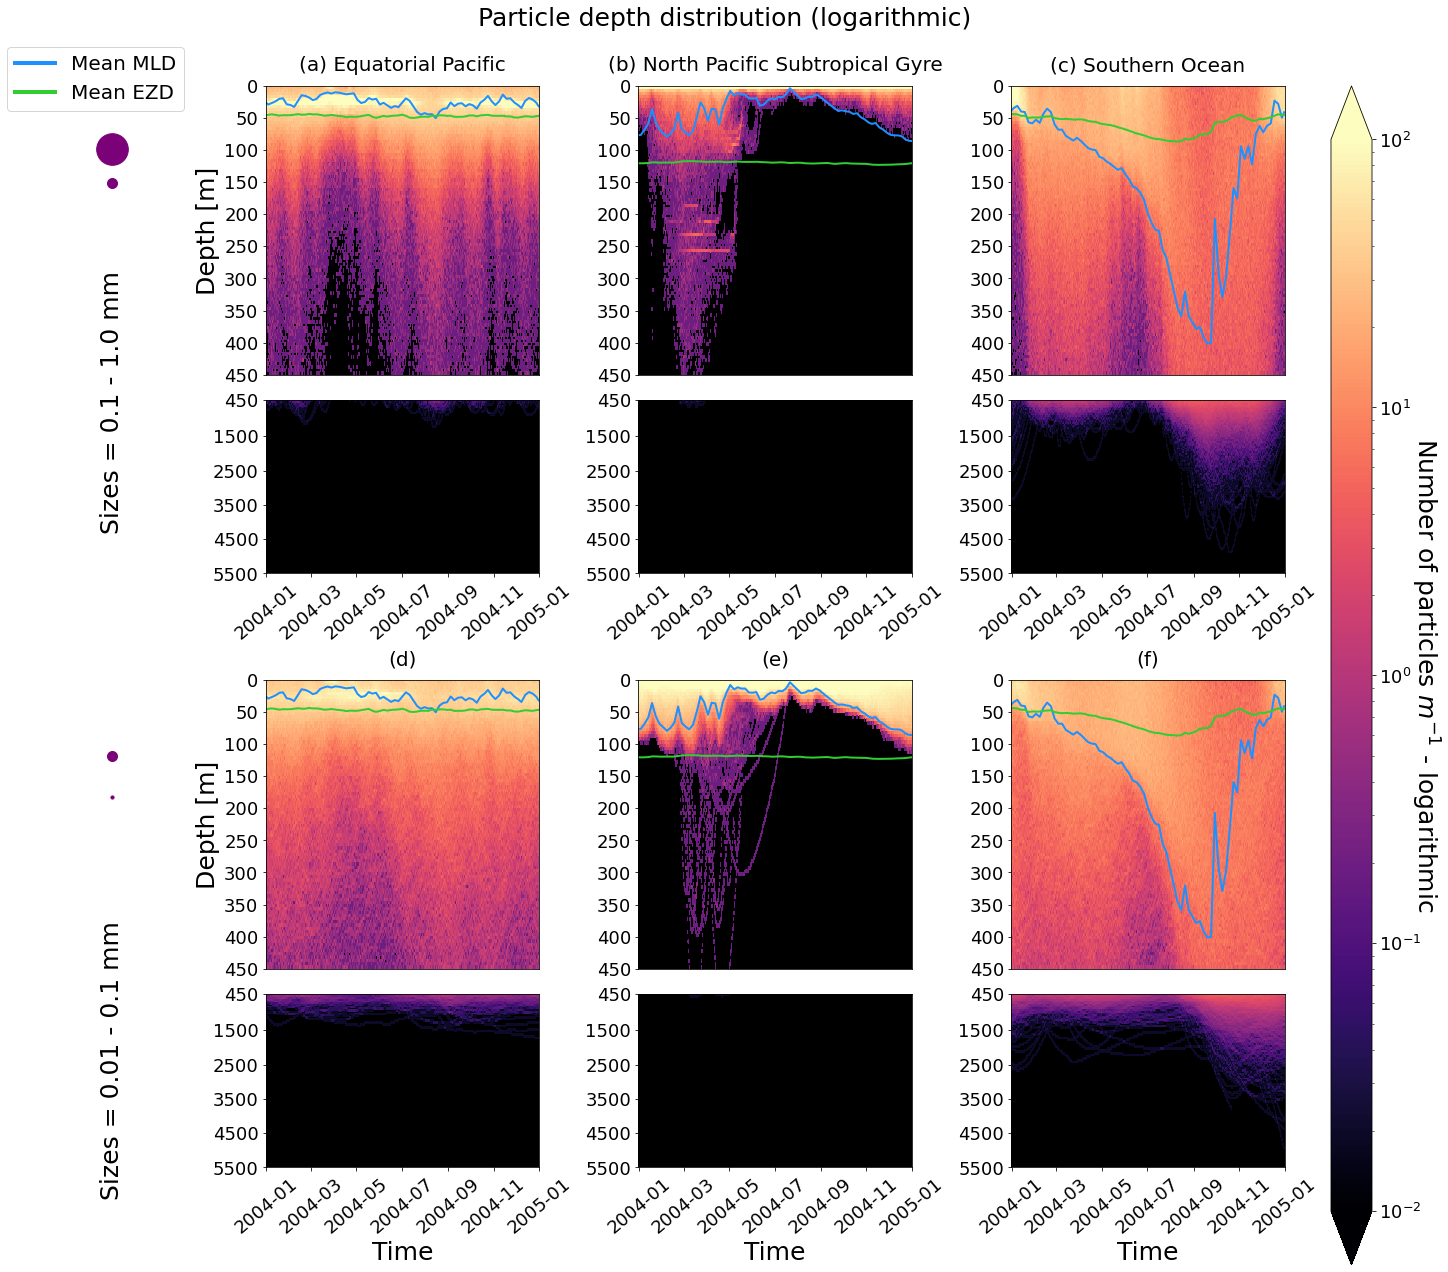

In [18]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax11 = fig.add_subplot(gs[:5, 3])
ax12 = fig.add_subplot(gs[5:8, 3])
ax13 = fig.add_subplot(gs[8:13, 3])
ax14 = fig.add_subplot(gs[13:16, 3])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]

for i, ax_r in enumerate(axes[1:]):   # column: region
    for c, ax_s in enumerate(ax_r):   # row: size
        for j, ax in enumerate(ax_s): # subfigure: depth
            ax.set_facecolor('k')
            ax.tick_params(axis='both', labelsize=18)#13
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_numbers[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=depth_cmap,norm=mcolors.LogNorm(vmin=1e-2, vmax=1e2))
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
#                 ax.set_yticks(np.concatenate((np.arange(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],-50),[depthbins[sub_depths[j][0]]])))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ regions[region[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
#                 ax.set_yticks((np.arange(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],-1000)))
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
 
        
cb = fig.colorbar(pc, cax=ax15, extend='both')
cb.set_label('Number of particles $m^{-1}$ - logarithmic', size=25, rotation=270, labelpad=20)
cb.ax.tick_params(labelsize=18) #13)

fig.suptitle('Particle depth distribution (logarithmic)', fontsize=25, y=1.03) #20) #January 2004 - January 2005 
#plt.subplots_adjust(top=0.92)
#fig.tight_layout(h_pad=1)
#fig.tight_layout()
for k, ds_r in enumerate(split_ds_0):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=25, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
# plt.savefig(datadir+'fig02_v1_1020')

## Figure 3

Text(0.5, 0.98, 'Annual average particle depth distribution')

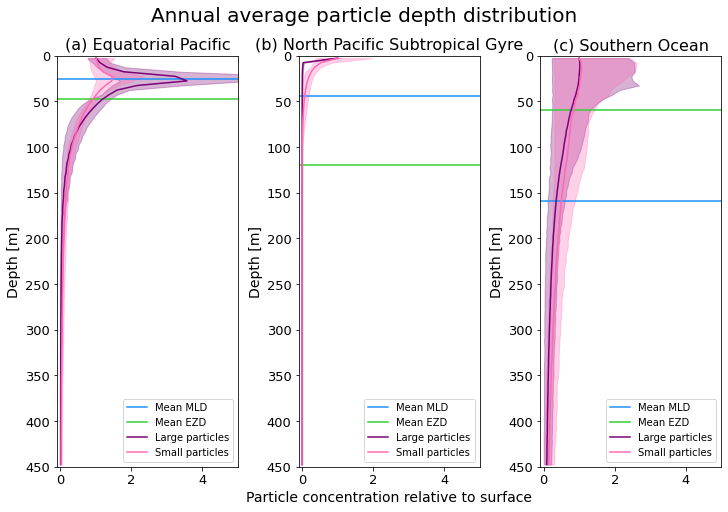

In [20]:
depth_profiles = np.mean(depth_numbers,axis=2)
depth_low = np.percentile(depth_numbers, 5, axis=2)
depth_high = np.percentile(depth_numbers, 95, axis=2)
 
fig = plt.figure(figsize=(10,7),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,1], figure=fig)


ax3 = fig.add_subplot(gs[0, 0])
ax7 = fig.add_subplot(gs[0, 1])
ax11 = fig.add_subplot(gs[0, 2])
axes = [ax3,ax7,ax11]

for i, ax in enumerate(axes):   # column: region
    j=0
#     for c, ax_s in enumerate(ax_r):   # row: size
#     for j, ax in enumerate(ax_r): # subfigure: depth
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlim(-0.1,5)
    ax.axhline(np.nanmean(mldlist[i][np.isfinite(mldlist[i])]),color='dodgerblue', label = 'Mean MLD')
    ax.axhline(np.nanmean(ezlist[i][np.isfinite(ezlist[i])]),color='limegreen', label = 'Mean EZD')
    ax.plot(depth_profiles[i,0,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,0,0],depthbins[sub_depths[j][0]:sub_depths[j][1]-1]+np.diff(depthbins[sub_depths[j][0]:sub_depths[j][1]])/2, color=r_pl_clist[0],label='Large particles')#
    ax.fill_betweenx(depthbins[sub_depths[j][0]:sub_depths[j][1]-1]+np.diff(depthbins[sub_depths[j][0]:sub_depths[j][1]])/2, depth_low[i,0,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,0,0], depth_high[i,0,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,0,0], color=r_pl_clist[0],alpha=0.3)
    ax.plot(depth_profiles[i,1,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,1,0],depthbins[sub_depths[j][0]:sub_depths[j][1]-1]+np.diff(depthbins[sub_depths[j][0]:sub_depths[j][1]])/2, color='hotpink',label='Small particles')#
    ax.fill_betweenx(depthbins[sub_depths[j][0]:sub_depths[j][1]-1]+np.diff(depthbins[sub_depths[j][0]:sub_depths[j][1]])/2, depth_low[i,1,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,1,0], depth_high[i,1,sub_depths[j][0]:sub_depths[j][1]-1]/depth_profiles[i,1,0],color='hotpink', alpha=0.3)
#     if j == 0:
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True) # labels along the bottom edge are off
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
    ax.set_title('('+chr(ord('a')+i)+') '+ regions[region[i]], fontsize=16)
#     if j == 1:
    ax.tick_params(axis='x') #, rotation=20)
    ax.legend(loc='lower right')
    if i==1:
        ax.set_xlabel('Particle concentration relative to surface', fontsize=14)

fig.suptitle('Annual average particle depth distribution', fontsize=20)

## Figure 4

#### Create and save vertical velocity data

In [21]:
depth_Ratio = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))

for h in range(len(dslist)):
    print('h='+str(h))
    for k in range(len(split_ds_0)):
        for i in range(timeperiod):
            for j in range(len(depthbins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>depthbins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<depthbins[j+1])
                vs0 = split_dslist[h][k][1]['vs_init'][:,obs_ids[0]+i].values[trajs0]
                w_m0 = split_dslist[h][k][1]['w_m'][:,obs_ids[0]+i].values[trajs0]
                w_adv0 = split_dslist[h][k][1]['w_adv'][:,obs_ids[0]+i].values[trajs0]
                w_m_b0 = split_dslist[h][k][1]['w_m_b'][:,obs_ids[0]+i].values[trajs0]
                depth_Ratio[h,k,i,j] = np.mean(np.divide(np.abs(vs0),np.abs(w_m0+w_adv0+w_m_b0)))

In [22]:
np.save(datadir+'depth_Ratio_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days.npy', depth_Ratio)

#### Plot

In [23]:
Ratio_cmap = copy(plt.get_cmap('cmo.curl_r'))

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

Ratio_cmap = truncate_colormap(Ratio_cmap, 0.1, 0.9)

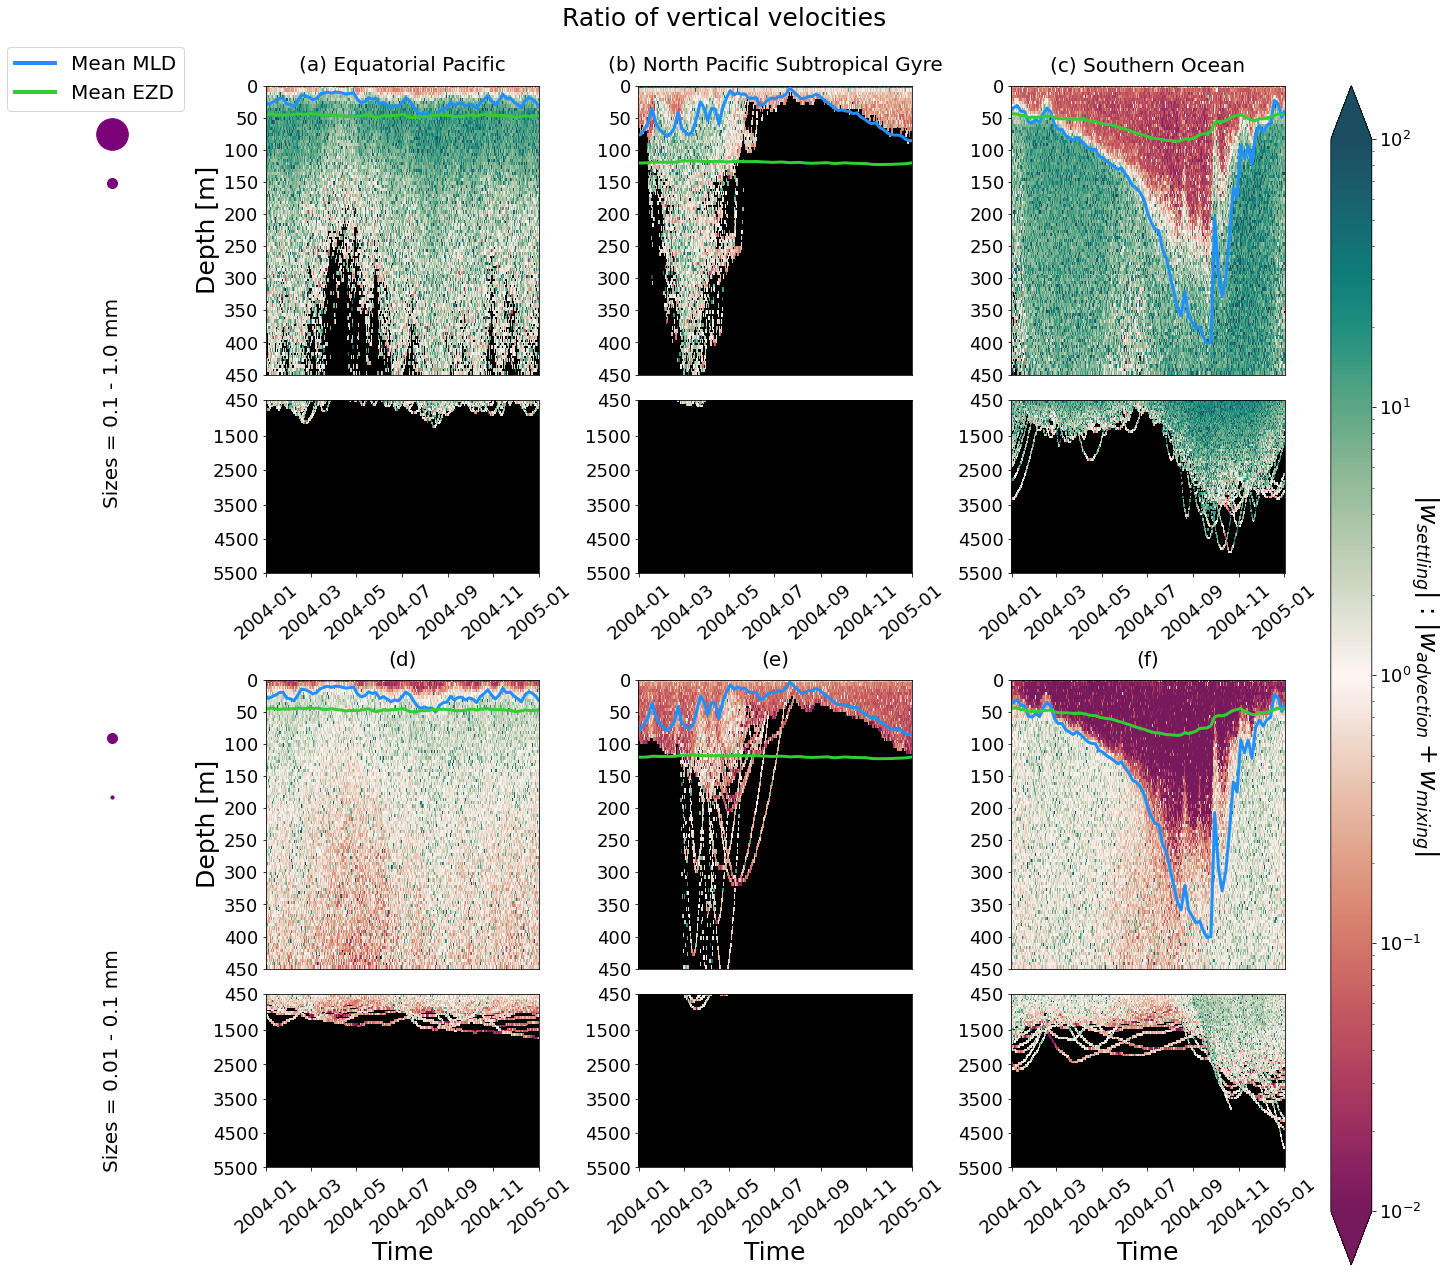

In [28]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax11 = fig.add_subplot(gs[:5, 3])
ax12 = fig.add_subplot(gs[5:8, 3])
ax13 = fig.add_subplot(gs[8:13, 3])
ax14 = fig.add_subplot(gs[13:16, 3])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_Ratio[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=Ratio_cmap,norm=mcolors.LogNorm(vmin=1e-2, vmax=1e2))
            ax.tick_params(axis='both', labelsize=18)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ regions[region[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
 
        
cb = fig.colorbar(pc, cax=ax15, extend='both')
cb.set_label('$|w_{settling}|$ : $|w_{advection}+w_{mixing}|$', size=25, rotation=270, labelpad=20)
cb.ax.tick_params(labelsize=18)

fig.suptitle('Ratio of vertical velocities', fontsize=25, y=1.03)

for k, ds_r in enumerate(split_ds_0):
    axes[0][k].scatter(0.5,0.90,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
plt.savefig(datadir+'fig04_v1')

## Figure 5

#### Create and save dominant terms data

In [25]:
depth_Dominant = np.ones((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))*-1
for h in range(len(dslist)):
    print('h='+str(h))
    for k in range(len(split_ds_0)):
        for i in range(timeperiod):
            for j in range(len(depthbins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>depthbins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<depthbins[j+1])
                growth = split_dslist[h][k][1]['a_growth'][:,obs_ids[0]+i].values[trajs0]
                coll = split_dslist[h][k][1]['a_coll'][:,obs_ids[0]+i].values[trajs0]
                grazing = split_dslist[h][k][1]['a_gr'][:,obs_ids[0]+i].values[trajs0]
                lin = split_dslist[h][k][1]['a_l'][:,obs_ids[0]+i].values[trajs0]
                nonlin = split_dslist[h][k][1]['a_nl'][:,obs_ids[0]+i].values[trajs0]
                terms = np.array([np.mean(growth),np.mean(coll),np.mean(grazing),np.mean(lin),np.mean(nonlin)])
                if np.nanmax(terms)>0:
                    depth_Dominant[h,k,i,j] = np.argmax(terms)

In [26]:
np.save(datadir+'depth_Dominant_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days.npy', depth_Dominant)

#### Plot

In [27]:
Dominant_clist = ['#ABEBC6','#BB8FCE', '#F5B7B1', '#FCF3CF', '#92acee'] 
Dominant_cmap = LinearSegmentedColormap.from_list('Dominant_cmap', Dominant_clist, N=5)
Dominant_cmap.set_under('k')

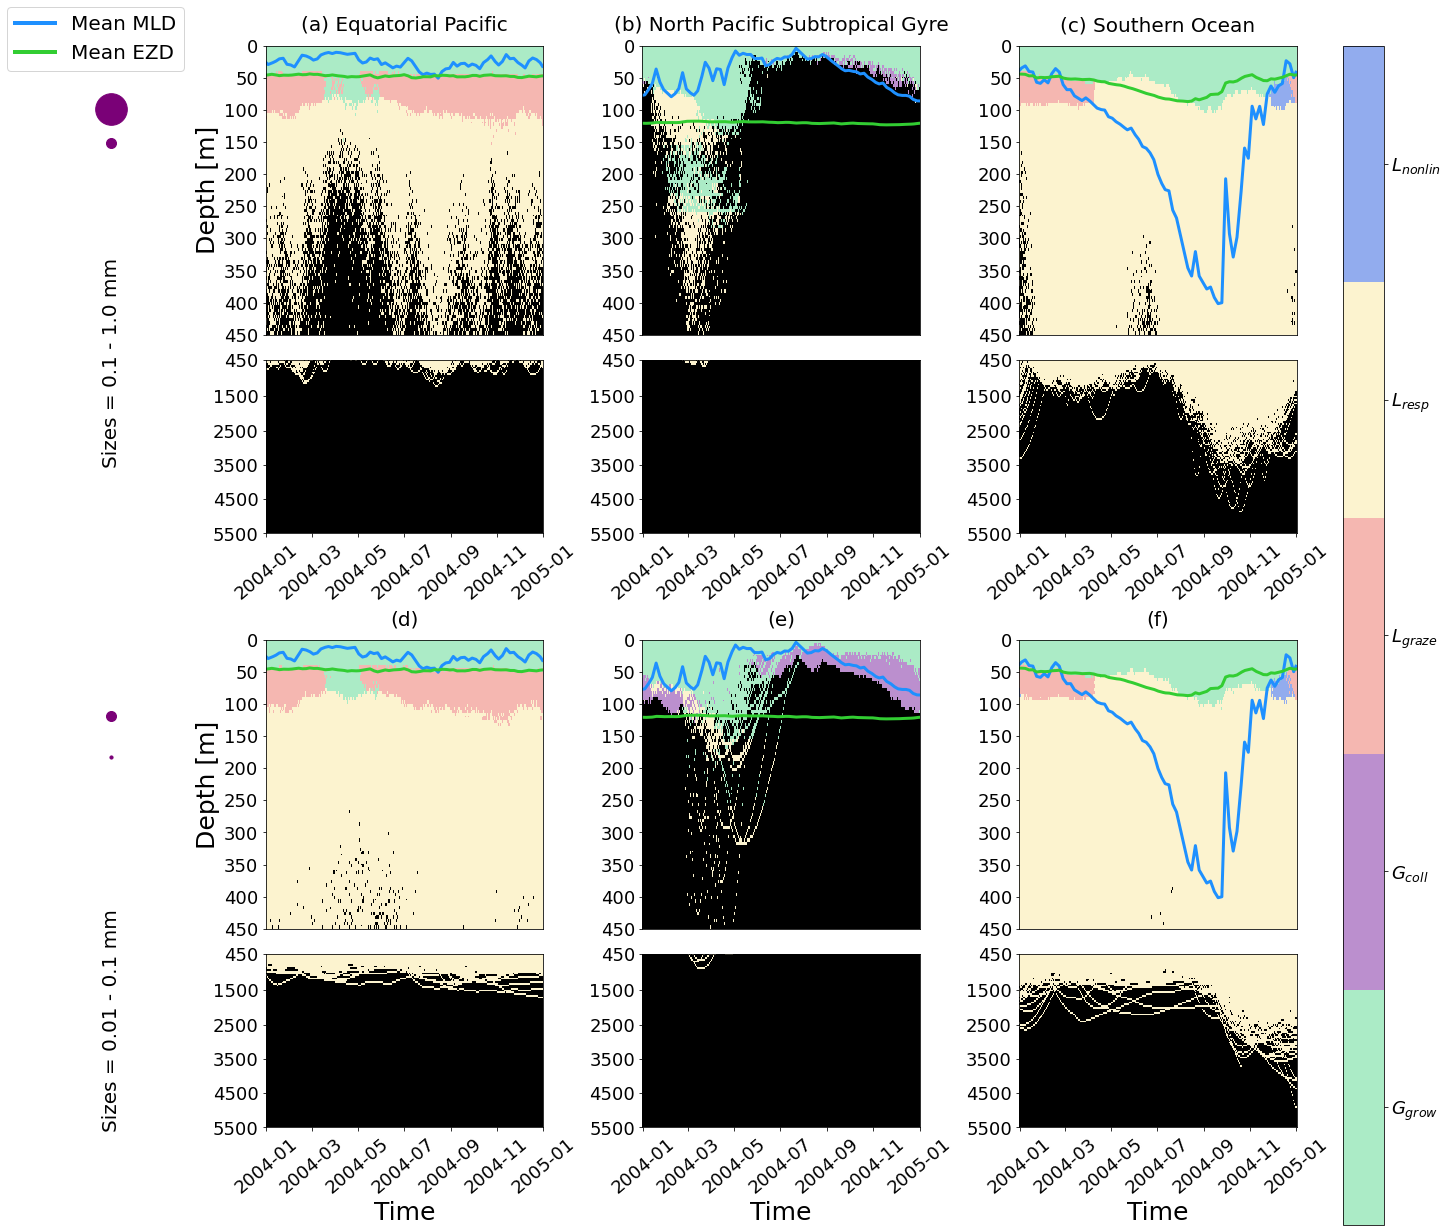

In [28]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax11 = fig.add_subplot(gs[:5, 3])
ax12 = fig.add_subplot(gs[5:8, 3])
ax13 = fig.add_subplot(gs[8:13, 3])
ax14 = fig.add_subplot(gs[13:16, 3])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]],[[ax11,ax12],[ax13,ax14]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_Dominant[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=Dominant_cmap,vmin=-0.5,vmax=4.5)#,norm=mcolors.LogNorm(vmin=1e-4, vmax=1e4))
            ax.tick_params(axis='both', labelsize=18)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ regions[region[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
        
cb = fig.colorbar(pc, cax=ax15, ticks=[0,1,2,3,4])
# cb.set_label('$Growth$ - $Collisions$', size=15)
cb.ax.set_yticklabels(['$G_{grow}$','$G_{coll}$','$L_{graze}$','$L_{resp}$','$L_{nonlin}$'], size=25)
cb.ax.tick_params(labelsize=18)

for k, ds_r in enumerate(split_ds_0):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
# plt.savefig(datadir+'fig_05_v1')

## Figure 6

In [29]:
terms_sums = np.zeros((len(dslist),5))
for i, ds in enumerate(dslist):
    total = np.mean(np.sum(ds['a_growth'],axis=1)) + np.mean(np.sum(ds['a_coll'],axis=1)) +np.mean(np.sum(ds['a_gr'],axis=1)) + np.mean(np.sum(ds['a_resp'],axis=1)) + np.mean(np.sum(ds['a_nl'],axis=1))
    terms_sums[i,0] = np.mean(np.sum(ds['a_growth'],axis=1))/total
    terms_sums[i,1] = np.mean(np.sum(ds['a_coll'],axis=1))/total
    terms_sums[i,2] = np.mean(np.sum(ds['a_gr'],axis=1))/total
    terms_sums[i,3] = np.mean(np.sum(ds['a_resp'],axis=1))/total
    terms_sums[i,4] = np.mean(np.sum(ds['a_nl'],axis=1))/total

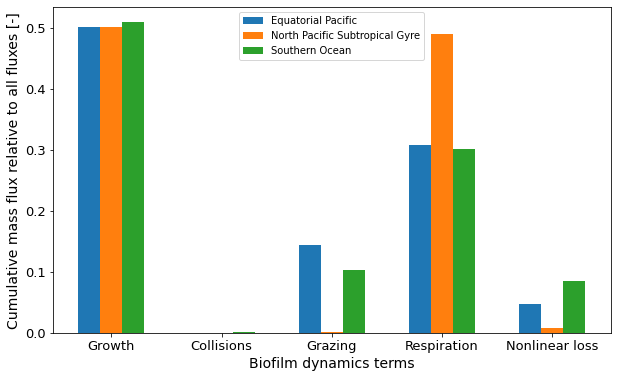

In [30]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

x_locs = np.arange(5)
for i in range(len(terms_sums)):
    ax.bar(x_locs+i*0.2-0.2,terms_sums[i],0.2,label=regions[region[i]])
ax.set_ylabel('Cumulative mass flux relative to all fluxes [-]', fontsize=14)
ax.set_xlabel('Biofilm dynamics terms', fontsize=14)
ax.set_xticks(x_locs)
ax.tick_params(axis='y', labelsize=13)
ax.set_xticklabels(['Growth','Collisions','Grazing','Respiration','Nonlinear loss'], fontsize=13)
ax.legend(loc='upper center')

## Figure A1

In [32]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'vs_init', 'w_adv']#, 'w_m_b']
w_list_names = ['Stochastic Kz', 'Potential settling velocity', 'Model advection']
w_pdf = np.zeros((2,len(w_list),len(w_bins)-1))
linestyles=['-','-.']

In [33]:
ds_mld = ds_2.where(ds_2['z']<ds_2['mld'])
ds_deep = ds_2.where(ds_2['z']>ds_2['mld'])

mldlist = [ds_mld, ds_deep]

for j,w in enumerate(w_list):
    vals_mld, bins_mld = np.histogram(ds_mld[w], w_bins)
    w_pdf[0,j,:] = vals_mld/ds_mld[w].size
    vals_deep, bins_deep = np.histogram(ds_deep[w], w_bins)
    w_pdf[1,j,:] = vals_deep/ds_deep[w].size

In [34]:
w_widths = np.ones(w_pdf.shape[2])
w_centers = np.arange(w_pdf.shape[2])
w_edges = np.arange(w_pdf.shape[2]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

In [35]:
w_pdf_sizes = np.zeros((2,len(w_list),len(sizebinedges)-1,len(w_bins)-1))

for i,ds_l in enumerate(mldlist):
    split_ds = list(ds_l.groupby_bins('r_pl',sizebinedges[::-1]))
    for j,w in enumerate(w_list):
        for k,ds_r in enumerate(split_ds):
            vals, bins = np.histogram(ds_r[1][w], w_bins)
            w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

In [36]:
mld_text = ['Above mixed layer', 'Below mixed layer']


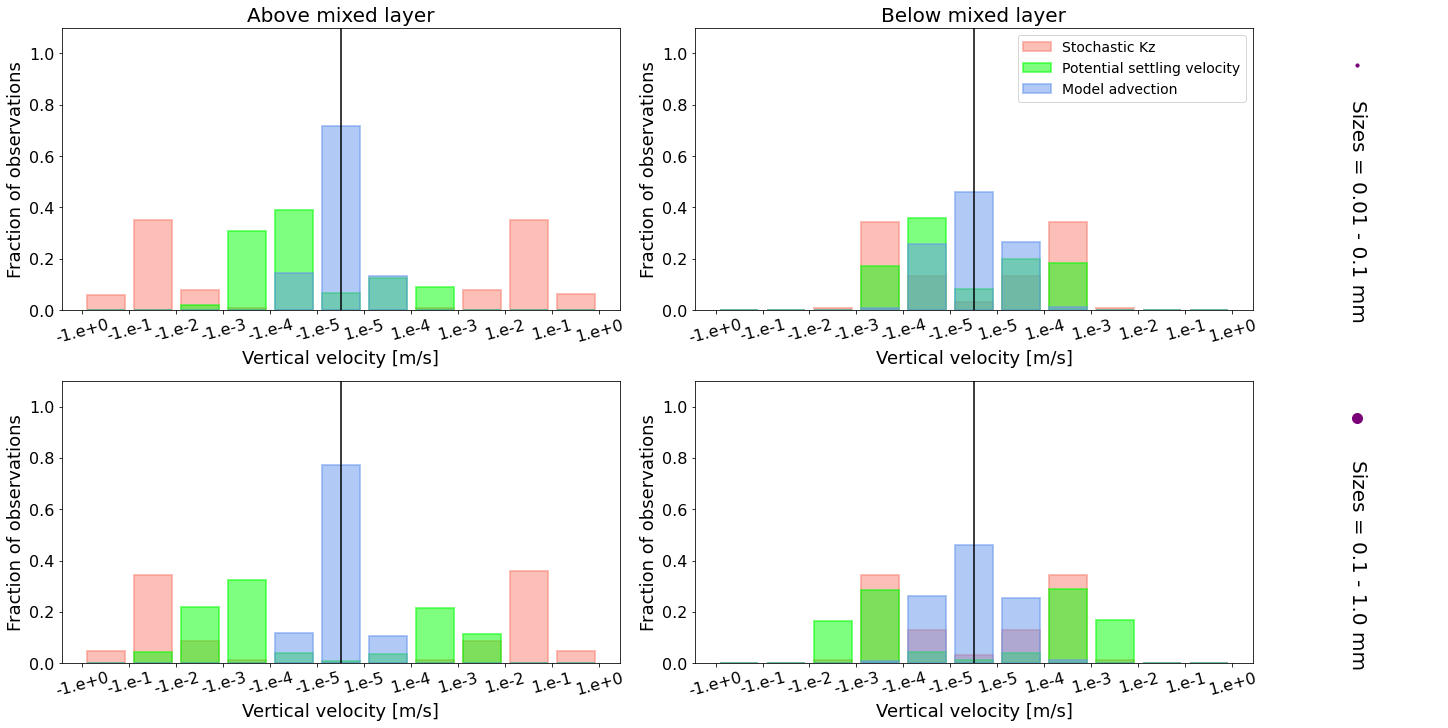

In [37]:
fig = plt.figure(figsize=(20,10),constrained_layout=True)
# fig.suptitle('Vertical velocities', fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[1,1,0.3],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6]]

for i,ds in enumerate(mldlist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        for j,w in enumerate(w_list):
            axes[i][k].bar(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w_list_names[j], zorder=1)
        axes[i][k].set_ylim(0,1.1)
        axes[i][k].set_xticks(w_edges)
        axes[i][k].vlines(5, 0, 1.2, colors='k', zorder=2)
        axes[i][k].set_xticklabels(w_bin_str)
#         axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].tick_params(axis='x', rotation=15)
        axes[i][k].set_ylabel('Fraction of observations', fontsize=18)
        axes[i][k].set_xlabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(mld_text[i], fontsize=20)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    axes[2][k].scatter(0.5,0.87,s=sizebinedges[-k-1]*1000000,color=r_pl_clist[0])
    axes[2][k].set_ylim(0,1)
    axes[2][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[2][k].axis('off')
axes[1][0].legend(fontsize=14, loc='upper right')#bbox_to_anchor=(0.7, 1))


### Trajectories t-z plane

In [11]:
number_of_trajectories_to_plot = 33
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 33 of 10000 trajectories
plotting every 303 particles


In [15]:
for ds in dslist:
    ds['days'] = (['traj','obs'],(ds['time'][:,:].T.values-ds['time'][:,obs_ids[0]].T.values).T.astype(np.float64)/86400/1e9)
radii = np.unique(ds_0['r_pl'])

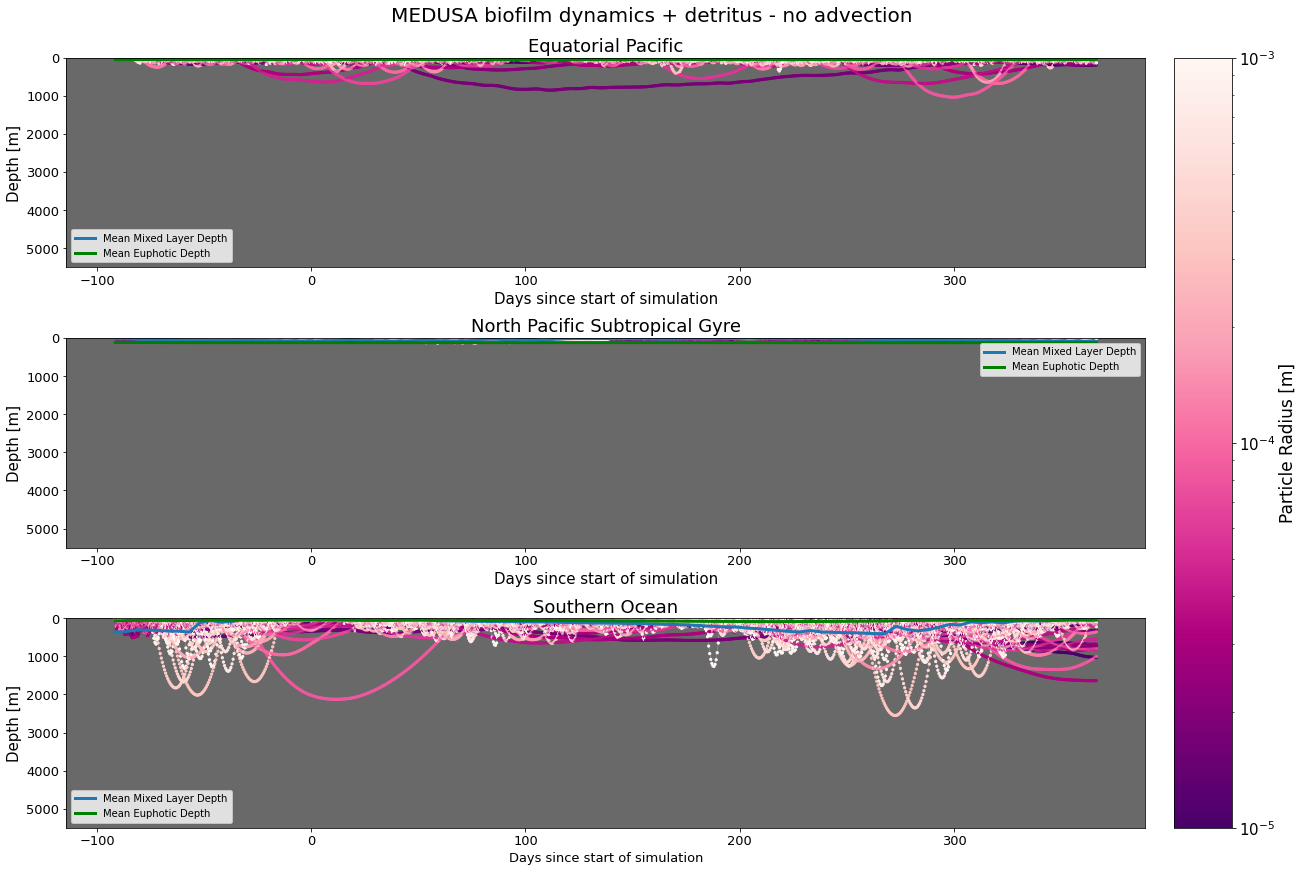

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(18,12), constrained_layout=True)
fig.suptitle('MEDUSA biofilm dynamics + detritus - no advection', fontsize=20)

sc = axs[0].scatter(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = axs[0].plot(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[0].plot(ds_0['days'][0,:], mld_0, linewidth=3, label='Mean Mixed Layer Depth') #ds_0['days'][0,:]
axs[0].plot(ds_0['days'][0,:], ez_0, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[0].set_title(regions[region[0]], fontsize=18)
axs[0].set_ylabel('Depth [m]', fontsize=15)
axs[0].set_xlabel('Days since start of simulation', fontsize=15)
axs[0].tick_params(axis='both', labelsize=13)
axs[0].set_facecolor('dimgray')
axs[0].set_ylim(5500,0)
# axs[0].set_xlim(-2,732)
# axs[0].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[0].legend()

sc = axs[1].scatter(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = axs[1].plot(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[1].plot(ds_1['days'][0,:], mld_1, linewidth=3, label='Mean Mixed Layer Depth')
axs[1].plot(ds_1['days'][0,:], ez_1, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[1].set_title(regions[region[1]], fontsize=18)
axs[1].set_ylabel('Depth [m]', fontsize=15)
axs[1].set_xlabel('Days since start of simulation', fontsize=15)
axs[1].tick_params(axis='both', labelsize=13)
axs[1].set_facecolor('dimgray')
axs[1].set_ylim(5500,0)
# axs[1].set_xlim(-2,732)
# axs[1].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[1].legend()

sc = axs[2].scatter(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=mcolors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = axs[2].plot(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[2].plot(ds_2['days'][0,:], mld_2, linewidth=3, label='Mean Mixed Layer Depth')
axs[2].plot(ds_2['days'][0,:], ez_2, linewidth=3, c='green', label='Mean Euphotic Depth')
axs[2].set_title(regions[region[2]], fontsize=18)
axs[2].set_ylabel('Depth [m]', fontsize=15)
axs[2].set_xlabel('Days since start of simulation', fontsize=13)
axs[2].tick_params(axis='both', labelsize=13)
axs[2].set_facecolor('dimgray')
axs[2].set_ylim(5500,0)
# axs[2].set_xlim(-2,732)
# axs[2].set_xticks([0,20,40,60,80,100,120,140,160,180])
axs[2].legend()

cb = fig.colorbar(sc, ax=axs)
cb.set_label('Particle Radius [m]', fontsize=17)
cb.ax.tick_params(labelsize=15)
plt.show()